### We're going to use a new dataset here, to demonstrate how to deal with larger datasets. This is a subset of the of 311 service requests from [NYC Open Data](https://nycopendata.socrata.com/Social-Services/311-Service-Requests-from-2010-to-Present/erm2-nwe9). 

Import pandas, numpy

In [1]:
import pandas as pd
import numpy as np

# 1. Open the data using read_csv and give it a name complains

Depending on your pandas version, you might see an error like "DtypeWarning: Columns (8) have mixed types". This means that it's encountered a problem reading in our data. In this case it almost certainly means that it has columns where some of the entries are strings and some are integers.
#### pd.read_csv('______________.csv',`dtype='unicode'`)

In [2]:
complains=pd.read_csv("311-service-requests.csv", dtype='unicode') 

# 2. What's even in it? (the summary)


Here we can find a data set with the date of the 311 service request and a collection of incidents by the NYPD.
Info tells us the columns name, the count and the Dtype, Head the first 5 rows, tail the last 5 and sample a random one. 

In [3]:
complains.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111069 entries, 0 to 111068
Data columns (total 52 columns):
 #   Column                          Non-Null Count   Dtype 
---  ------                          --------------   ----- 
 0   Unique Key                      111069 non-null  object
 1   Created Date                    111069 non-null  object
 2   Closed Date                     60270 non-null   object
 3   Agency                          111069 non-null  object
 4   Agency Name                     111069 non-null  object
 5   Complaint Type                  111069 non-null  object
 6   Descriptor                      110613 non-null  object
 7   Location Type                   79022 non-null   object
 8   Incident Zip                    98807 non-null   object
 9   Incident Address                84441 non-null   object
 10  Street Name                     84432 non-null   object
 11  Cross Street 1                  84728 non-null   object
 12  Cross Street 2                

In [4]:
complains.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,26589651,10/31/2013 02:08:41 AM,NaN,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11432,90-03 169 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.70827532593202,-73.79160395779721,"(40.70827532593202, -73.79160395779721)"
1,26593698,10/31/2013 02:01:04 AM,NaN,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11378,58 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.721040535628305,-73.90945306791765,"(40.721040535628305, -73.90945306791765)"
2,26594139,10/31/2013 02:00:24 AM,10/31/2013 02:40:32 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10032,4060 BROADWAY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.84332975466513,-73.93914371913482,"(40.84332975466513, -73.93914371913482)"
3,26595721,10/31/2013 01:56:23 AM,10/31/2013 02:21:48 AM,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Horn,Street/Sidewalk,10023,WEST 72 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.7780087446372,-73.98021349023975,"(40.7780087446372, -73.98021349023975)"
4,26590930,10/31/2013 01:53:44 AM,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Condition Attracting Rodents,Vacant Lot,10027,WEST 124 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.80769092704951,-73.94738703491433,"(40.80769092704951, -73.94738703491433)"


In [5]:
complains.tail()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
111064,26426013,10/04/2013 12:01:13 AM,10/07/2013 04:07:16 PM,DPR,Department of Parks and Recreation,Maintenance or Facility,Structure - Outdoors,Park,11213,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
111065,26428083,10/04/2013 12:01:05 AM,10/04/2013 02:13:50 AM,NYPD,New York City Police Department,Illegal Parking,Posted Parking Sign Violation,Street/Sidewalk,11434,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.656160351546845,-73.76735262738222,"(40.656160351546845, -73.76735262738222)"
111066,26428987,10/04/2013 12:00:45 AM,10/04/2013 01:25:01 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,10016,344 EAST 28 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.740295354643706,-73.97695165980414,"(40.740295354643706, -73.97695165980414)"
111067,26426115,10/04/2013 12:00:28 AM,10/04/2013 04:17:32 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Talking,Club/Bar/Restaurant,11226,1233 FLATBUSH AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.64018174662485,-73.95530566958138,"(40.64018174662485, -73.95530566958138)"
111068,26428033,10/04/2013 12:00:10 AM,10/04/2013 01:20:52 AM,NYPD,New York City Police Department,Blocked Driveway,Partial Access,Street/Sidewalk,11236,1259 EAST 94 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.640024057399216,-73.90071711703163,"(40.640024057399216, -73.90071711703163)"


In [6]:
complains.sample()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
35499,26537996,10/23/2013 08:16:26 PM,10/24/2013 02:16:48 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11218,312 EAST 2 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.6439872003525,-73.97847314181318,"(40.6439872003525, -73.97847314181318)"


## spaces in column names are replaced with ‘_’

In [7]:
complains.columns=[column.replace(" ", "_") for column in complains.columns]

In [8]:
complains.head(2)

,Unique_Key,Created_Date,Closed_Date,Agency,Agency_Name,Complaint_Type,Descriptor,Location_Type,Incident_Zip,Incident_Address,...,Bridge_Highway_Name,Bridge_Highway_Direction,Road_Ramp,Bridge_Highway_Segment,Garage_Lot_Name,Ferry_Direction,Ferry_Terminal_Name,Latitude,Longitude,Location
0,26589651,10/31/2013 02:08:41 AM,NaN,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11432,90-03 169 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.70827532593202,-73.79160395779721,"(40.70827532593202, -73.79160395779721)"
1,26593698,10/31/2013 02:01:04 AM,NaN,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11378,58 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.721040535628305,-73.90945306791765,"(40.721040535628305, -73.90945306791765)"


# 3. Convert the data time columns in the data set from object to datetime format

In [9]:
complains['Created_Date']=pd.to_datetime(complains["Created_Date"])

In [10]:
complains['Closed_Date']=pd.to_datetime(complains["Closed_Date"])

In [11]:
complains.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111069 entries, 0 to 111068
Data columns (total 52 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   Unique_Key                      111069 non-null  object        
 1   Created_Date                    111069 non-null  datetime64[ns]
 2   Closed_Date                     60270 non-null   datetime64[ns]
 3   Agency                          111069 non-null  object        
 4   Agency_Name                     111069 non-null  object        
 5   Complaint_Type                  111069 non-null  object        
 6   Descriptor                      110613 non-null  object        
 7   Location_Type                   79022 non-null   object        
 8   Incident_Zip                    98807 non-null   object        
 9   Incident_Address                84441 non-null   object        
 10  Street_Name                     84432 non-null   object 

In [12]:
complains.head(5)

,Unique_Key,Created_Date,Closed_Date,Agency,Agency_Name,Complaint_Type,Descriptor,Location_Type,Incident_Zip,Incident_Address,...,Bridge_Highway_Name,Bridge_Highway_Direction,Road_Ramp,Bridge_Highway_Segment,Garage_Lot_Name,Ferry_Direction,Ferry_Terminal_Name,Latitude,Longitude,Location
0,26589651,2013-10-31 02:08:41,NaT,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11432,90-03 169 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.70827532593202,-73.79160395779721,"(40.70827532593202, -73.79160395779721)"
1,26593698,2013-10-31 02:01:04,NaT,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11378,58 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.721040535628305,-73.90945306791765,"(40.721040535628305, -73.90945306791765)"
2,26594139,2013-10-31 02:00:24,2013-10-31 02:40:32,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10032,4060 BROADWAY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.84332975466513,-73.93914371913482,"(40.84332975466513, -73.93914371913482)"
3,26595721,2013-10-31 01:56:23,2013-10-31 02:21:48,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Horn,Street/Sidewalk,10023,WEST 72 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.7780087446372,-73.98021349023975,"(40.7780087446372, -73.98021349023975)"
4,26590930,2013-10-31 01:53:44,NaT,DOHMH,Department of Health and Mental Hygiene,Rodent,Condition Attracting Rodents,Vacant Lot,10027,WEST 124 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.80769092704951,-73.94738703491433,"(40.80769092704951, -73.94738703491433)"


# 4. Drop all the columns where most of the rows are null. Think logically

Tacking into account that the range index is from  0 to 111068, I would consider that we can drop the ones that at least have the half of the values null. Also latitude and longitud because both are in Location

In [13]:
complains.columns

Index(['Unique_Key', 'Created_Date', 'Closed_Date', 'Agency', 'Agency_Name',
       'Complaint_Type', 'Descriptor', 'Location_Type', 'Incident_Zip',
       'Incident_Address', 'Street_Name', 'Cross_Street_1', 'Cross_Street_2',
       'Intersection_Street_1', 'Intersection_Street_2', 'Address_Type',
       'City', 'Landmark', 'Facility_Type', 'Status', 'Due_Date',
       'Resolution_Action_Updated_Date', 'Community_Board', 'Borough',
       'X_Coordinate_(State_Plane)', 'Y_Coordinate_(State_Plane)',
       'Park_Facility_Name', 'Park_Borough', 'School_Name', 'School_Number',
       'School_Region', 'School_Code', 'School_Phone_Number', 'School_Address',
       'School_City', 'School_State', 'School_Zip', 'School_Not_Found',
       'School_or_Citywide_Complaint', 'Vehicle_Type', 'Taxi_Company_Borough',
       'Taxi_Pick_Up_Location', 'Bridge_Highway_Name',
       'Bridge_Highway_Direction', 'Road_Ramp', 'Bridge_Highway_Segment',
       'Garage_Lot_Name', 'Ferry_Direction', 'Ferry_Termina

In [14]:
complains.drop(['Intersection_Street_1', 'Intersection_Street_2', 'Landmark', 'Facility_Type', 'Due_Date', 'School_Not_Found', 'School_or_Citywide_Complaint','Vehicle_Type', 'Taxi_Company_Borough', 'Taxi_Pick_Up_Location', 'Bridge_Highway_Name', 'Bridge_Highway_Direction', 'Road_Ramp', 'Bridge_Highway_Segment', 'Garage_Lot_Name', 'Ferry_Direction', 'Ferry_Terminal_Name', 'Latitude', 'Longitude'], axis=1, inplace=True)

In [15]:
complains.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111069 entries, 0 to 111068
Data columns (total 33 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   Unique_Key                      111069 non-null  object        
 1   Created_Date                    111069 non-null  datetime64[ns]
 2   Closed_Date                     60270 non-null   datetime64[ns]
 3   Agency                          111069 non-null  object        
 4   Agency_Name                     111069 non-null  object        
 5   Complaint_Type                  111069 non-null  object        
 6   Descriptor                      110613 non-null  object        
 7   Location_Type                   79022 non-null   object        
 8   Incident_Zip                    98807 non-null   object        
 9   Incident_Address                84441 non-null   object        
 10  Street_Name                     84432 non-null   object 

# 5. Select the column name `Complaint_Type`,  
## find out no. of unique values in the series or data, 
## print top 5 rows of the data

In [16]:
complains['Complaint_Type'].value_counts()

HEATING                           14200
GENERAL CONSTRUCTION               7471
Street Light Condition             7117
DOF Literature Request             5797
PLUMBING                           5373
                                  ...  
Municipal Parking Facility            1
Tunnel Condition                      1
DHS Income Savings Requirement        1
Stalled Sites                         1
X-Ray Machine/Equipment               1
Name: Complaint_Type, Length: 165, dtype: int64

In [17]:
complains['Complaint_Type'].value_counts().count()

165

The number of unique values of this row is the length of it, 165. 

In [18]:
complains['Complaint_Type'].value_counts().head() #Top 5 values

HEATING                   14200
GENERAL CONSTRUCTION       7471
Street Light Condition     7117
DOF Literature Request     5797
PLUMBING                   5373
Name: Complaint_Type, dtype: int64

# 6. Selecting multiple columns
What if we just want to know the complaint type and the borough, but not the rest of the information?

We can create a new df with these columns 

In [19]:
complainsnew=complains[['Complaint_Type','Borough']]

In [20]:
complainsnew

,Complaint_Type,Borough
0,Noise - Street/Sidewalk,QUEENS
1,Illegal Parking,QUEENS
2,Noise - Commercial,MANHATTAN
3,Noise - Vehicle,MANHATTAN
4,Rodent,MANHATTAN
...,...,...
111064,Maintenance or Facility,BROOKLYN
111065,Illegal Parking,QUEENS
111066,Noise - Street/Sidewalk,MANHATTAN
111067,Noise - Commercial,BROOKLYN


# 7. Rename the `Borough` to `District`

In [21]:
complains=complains.rename(columns={'Borough': 'District'})

In [22]:
complains.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111069 entries, 0 to 111068
Data columns (total 33 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   Unique_Key                      111069 non-null  object        
 1   Created_Date                    111069 non-null  datetime64[ns]
 2   Closed_Date                     60270 non-null   datetime64[ns]
 3   Agency                          111069 non-null  object        
 4   Agency_Name                     111069 non-null  object        
 5   Complaint_Type                  111069 non-null  object        
 6   Descriptor                      110613 non-null  object        
 7   Location_Type                   79022 non-null   object        
 8   Incident_Zip                    98807 non-null   object        
 9   Incident_Address                84441 non-null   object        
 10  Street_Name                     84432 non-null   object 

# 8. What's the most common complaint type?
display top 10 most common compalin


In [23]:
complains['Complaint_Type'].value_counts().head(1) 

HEATING    14200
Name: Complaint_Type, dtype: int64

The most common Complaint Type is Heating

In [24]:
complains['Complaint_Type'].value_counts().head(10) #10 most common complains 

HEATING                   14200
GENERAL CONSTRUCTION       7471
Street Light Condition     7117
DOF Literature Request     5797
PLUMBING                   5373
PAINT - PLASTER            5149
Blocked Driveway           4590
NONCONST                   3998
Street Condition           3473
Illegal Parking            3343
Name: Complaint_Type, dtype: int64

#  Plot the top 10 most common compalin

<AxesSubplot:ylabel='Complaint_Type'>

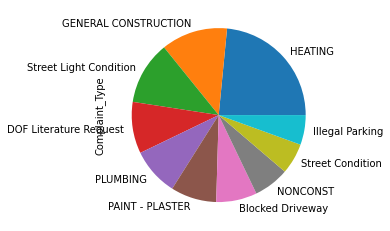

In [25]:
complains['Complaint_Type'].value_counts().head(10).plot(kind='pie')

<AxesSubplot:>

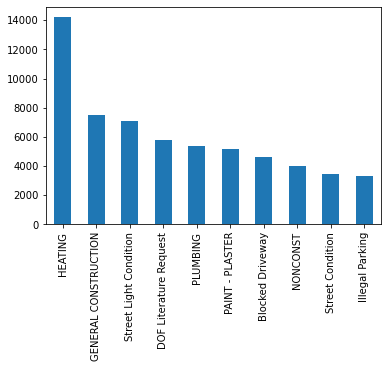

In [26]:
complains['Complaint_Type'].value_counts().head(10).plot(kind='bar')

# 9. What's the most common `District` the complain came?
display top 10 most and plot them out

In [27]:
complains['District'].value_counts().head(1) #Most common

BROOKLYN    32890
Name: District, dtype: int64

In [28]:
complains['District'].value_counts().head(10)

BROOKLYN         32890
MANHATTAN        24288
QUEENS           22281
BRONX            19686
Unspecified       7107
STATEN ISLAND     4817
Name: District, dtype: int64

There are just 6 labels for the districts.

<AxesSubplot:ylabel='District'>

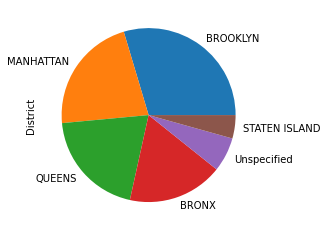

In [29]:
complains['District'].value_counts().head(10).plot(kind='pie')

<AxesSubplot:>

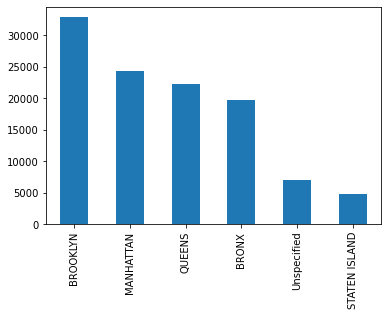

In [30]:
complains['District'].value_counts().head(10).plot(kind='bar')

# 10. Select only top 10 Illegal Parking complains at  Queens district and save it to `new_complaint`. You can use `query`

In [31]:
new_complaint=complains.query('Complaint_Type=="Illegal Parking" & District=="QUEENS"').head(10)

In [32]:
new_complaint

,Unique_Key,Created_Date,Closed_Date,Agency,Agency_Name,Complaint_Type,Descriptor,Location_Type,Incident_Zip,Incident_Address,...,School_Name,School_Number,School_Region,School_Code,School_Phone_Number,School_Address,School_City,School_State,School_Zip,Location
1,26593698,2013-10-31 02:01:04,NaT,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11378,58 AVENUE,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,"(40.721040535628305, -73.90945306791765)"
116,26591037,2013-10-30 23:20:57,2013-10-31 02:16:39,NYPD,New York City Police Department,Illegal Parking,Blocked Hydrant,Street/Sidewalk,11417,133-40 85 STREET,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,"(40.67347065165803, -73.8511307325341)"
117,26592954,2013-10-30 23:20:26,2013-10-31 01:18:56,NYPD,New York City Police Department,Illegal Parking,Posted Parking Sign Violation,Street/Sidewalk,11365,197-05A 65 CRESCENT,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,"(40.73996897148448, -73.7768682381755)"
140,26592551,2013-10-30 23:01:49,NaT,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11379,77-15 58 AVENUE,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,"(40.726633034808366, -73.8835552085296)"
186,26591575,2013-10-30 22:33:28,2013-10-30 23:06:35,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11691,14-28 CHANDLER STREET,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,"(40.608860268959695, -73.75593130211928)"
193,26594762,2013-10-30 22:31:22,2013-10-31 02:28:02,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11356,20-42 125 STREET,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,"(40.78141708195395, -73.84323796414719)"
253,26592844,2013-10-30 21:46:18,2013-10-30 22:39:09,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11379,NaN,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,"(40.7086929311143, -73.8753699708503)"
284,26592833,2013-10-30 21:27:13,2013-10-31 00:44:51,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11433,NaN,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,"(40.70241414798045, -73.79252032151341)"
293,26594635,2013-10-30 21:22:34,2013-10-30 22:29:36,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11361,NaN,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,"(40.75439605091989, -73.77719529050601)"
319,26592819,2013-10-30 21:10:54,2013-10-31 01:50:30,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11413,185-11 WILLIAMSON AVENUE,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,"(40.680211769230816, -73.75749088965092)"


# 11 Filter top 3 columns `Complaint_Type,District, Created_Date,Descriptor` from the new_complaint

In [47]:
new_complaint

,Unique_Key,Created_Date,Closed_Date,Agency,Agency_Name,Complaint_Type,Descriptor,Location_Type,Incident_Zip,Incident_Address,...,School_Name,School_Number,School_Region,School_Code,School_Phone_Number,School_Address,School_City,School_State,School_Zip,Location
1,26593698,2013-10-31 02:01:04,NaT,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11378,58 AVENUE,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,"(40.721040535628305, -73.90945306791765)"
116,26591037,2013-10-30 23:20:57,2013-10-31 02:16:39,NYPD,New York City Police Department,Illegal Parking,Blocked Hydrant,Street/Sidewalk,11417,133-40 85 STREET,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,"(40.67347065165803, -73.8511307325341)"
117,26592954,2013-10-30 23:20:26,2013-10-31 01:18:56,NYPD,New York City Police Department,Illegal Parking,Posted Parking Sign Violation,Street/Sidewalk,11365,197-05A 65 CRESCENT,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,"(40.73996897148448, -73.7768682381755)"
140,26592551,2013-10-30 23:01:49,NaT,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11379,77-15 58 AVENUE,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,"(40.726633034808366, -73.8835552085296)"
186,26591575,2013-10-30 22:33:28,2013-10-30 23:06:35,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11691,14-28 CHANDLER STREET,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,"(40.608860268959695, -73.75593130211928)"
193,26594762,2013-10-30 22:31:22,2013-10-31 02:28:02,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11356,20-42 125 STREET,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,"(40.78141708195395, -73.84323796414719)"
253,26592844,2013-10-30 21:46:18,2013-10-30 22:39:09,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11379,NaN,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,"(40.7086929311143, -73.8753699708503)"
284,26592833,2013-10-30 21:27:13,2013-10-31 00:44:51,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11433,NaN,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,"(40.70241414798045, -73.79252032151341)"
293,26594635,2013-10-30 21:22:34,2013-10-30 22:29:36,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11361,NaN,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,"(40.75439605091989, -73.77719529050601)"
319,26592819,2013-10-30 21:10:54,2013-10-31 01:50:30,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11413,185-11 WILLIAMSON AVENUE,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,"(40.680211769230816, -73.75749088965092)"


In [46]:
new_complaint['Complaint_Type'].value_counts().head(3)

Illegal Parking    10
Name: Complaint_Type, dtype: int64

In [45]:
new_complaint['District'].value_counts().head(3)

QUEENS    10
Name: District, dtype: int64

In [44]:
new_complaint['Created_Date'].value_counts().head(3)

2013-10-31 02:01:04    1
2013-10-30 23:20:57    1
2013-10-30 23:20:26    1
Name: Created_Date, dtype: int64

In [43]:
new_complaint['Descriptor'].value_counts().head(3)

Commercial Overnight Parking     7
Blocked Hydrant                  1
Posted Parking Sign Violation    1
Name: Descriptor, dtype: int64

# 12 Save `new_complaint` dataframe to CSV format and load it back to verify the data

In [48]:
new_complaint.to_csv('311-service-requests_new' , index=False)

In [49]:
new_complaint1=pd.read_csv('311-service-requests_new')

In [51]:
new_complaint1 #It is the same 

,Unique_Key,Created_Date,Closed_Date,Agency,Agency_Name,Complaint_Type,Descriptor,Location_Type,Incident_Zip,Incident_Address,...,School_Name,School_Number,School_Region,School_Code,School_Phone_Number,School_Address,School_City,School_State,School_Zip,Location
0,26593698,2013-10-31 02:01:04,NaN,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11378,58 AVENUE,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,"(40.721040535628305, -73.90945306791765)"
1,26591037,2013-10-30 23:20:57,2013-10-31 02:16:39,NYPD,New York City Police Department,Illegal Parking,Blocked Hydrant,Street/Sidewalk,11417,133-40 85 STREET,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,"(40.67347065165803, -73.8511307325341)"
2,26592954,2013-10-30 23:20:26,2013-10-31 01:18:56,NYPD,New York City Police Department,Illegal Parking,Posted Parking Sign Violation,Street/Sidewalk,11365,197-05A 65 CRESCENT,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,"(40.73996897148448, -73.7768682381755)"
3,26592551,2013-10-30 23:01:49,NaN,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11379,77-15 58 AVENUE,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,"(40.726633034808366, -73.8835552085296)"
4,26591575,2013-10-30 22:33:28,2013-10-30 23:06:35,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11691,14-28 CHANDLER STREET,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,"(40.608860268959695, -73.75593130211928)"
5,26594762,2013-10-30 22:31:22,2013-10-31 02:28:02,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11356,20-42 125 STREET,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,"(40.78141708195395, -73.84323796414719)"
6,26592844,2013-10-30 21:46:18,2013-10-30 22:39:09,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11379,NaN,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,"(40.7086929311143, -73.8753699708503)"
7,26592833,2013-10-30 21:27:13,2013-10-31 00:44:51,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11433,NaN,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,"(40.70241414798045, -73.79252032151341)"
8,26594635,2013-10-30 21:22:34,2013-10-30 22:29:36,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11361,NaN,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,"(40.75439605091989, -73.77719529050601)"
9,26592819,2013-10-30 21:10:54,2013-10-31 01:50:30,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11413,185-11 WILLIAMSON AVENUE,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,"(40.680211769230816, -73.75749088965092)"
